In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

import numpy as np

In [2]:
df = pd.read_csv("compas-scores-two-years-preprocessed.csv", index_col=0)


In [3]:
y = df['two_year_recid'].astype(int)
X = df.drop(columns=['two_year_recid'])

In [4]:

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test

#Create a svm Classifier
clf = svm.SVC(kernel='rbf',class_weight='balanced',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [5]:

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.74
Precision: 0.66
Recall: 0.63


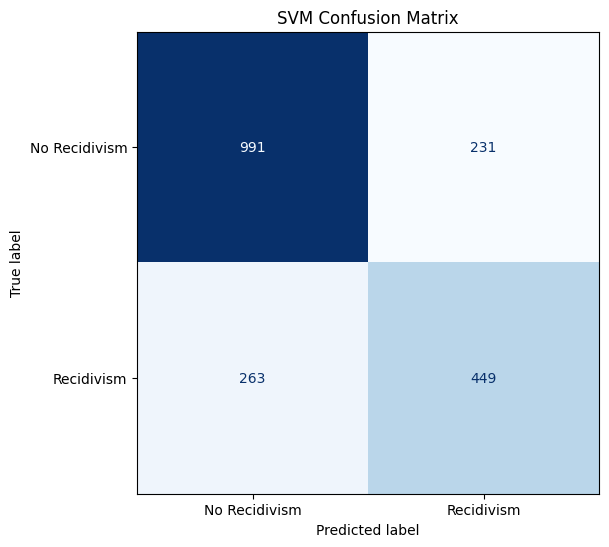

In [6]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['No Recidivism', 'Recidivism']
)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("SVM Confusion Matrix")
plt.show()

In [7]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, auc

In [8]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=clf, X=X, y=y, scoring="accuracy", cv=kfold)
cross_val_accuracy = cross_val_score(estimator=clf, X=X, y=y, scoring="accuracy", cv=kfold)
cross_val_accuracy_mean = np.mean(cross_val_accuracy)
cross_val_accuracy_std = np.std(cross_val_accuracy)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_accuracy_mean}")
print(f"Standard error on fold: {cross_val_accuracy_std}")

K-fold validation score [0.79566563 0.77399381 0.77089783 0.78328173 0.77089783 0.73602484
 0.80745342 0.77329193 0.76397516 0.79192547 0.74534161 0.78881988
 0.76397516 0.81055901 0.81677019 0.78881988 0.76708075 0.79503106
 0.79813665 0.75465839]
Average k-fold validation score : 0.7798300098071265
Average error on fold: 0.779970386323866
Standard error on fold: 0.0260130831229896


In [9]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=clf, X=X, y=y, scoring="precision", cv=kfold)
cross_val_precision = cross_val_score(estimator=clf, X=X, y=y, scoring="precision", cv=kfold)
cross_val_precision_mean = np.mean(cross_val_precision)
cross_val_precision_std = np.std(cross_val_precision)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_precision_mean}")
print(f"Standard error on fold: {cross_val_precision_std}")

K-fold validation score [0.68965517 0.70833333 0.7398374  0.7008547  0.6460177  0.66949153
 0.66666667 0.632      0.5984252  0.67889908 0.64925373 0.69724771
 0.66363636 0.58333333 0.67716535 0.6640625  0.7008547  0.71311475
 0.61068702 0.72727273]
Average k-fold validation score : 0.6708404484896354
Average error on fold: 0.6725298736634154
Standard error on fold: 0.03959214349458402


In [ ]:
kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=clf, X=X, y=y, scoring="recall", cv=kfold)
cross_val_recall = cross_val_score(estimator=clf, X=X, y=y, scoring="recall", cv=kfold)
cross_val_recall_mean = np.mean(cross_val_recall)
cross_val_recall_std = np.std(cross_val_recall)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_recall_mean}")
print(f"Standard error on fold: {cross_val_recall_std}")

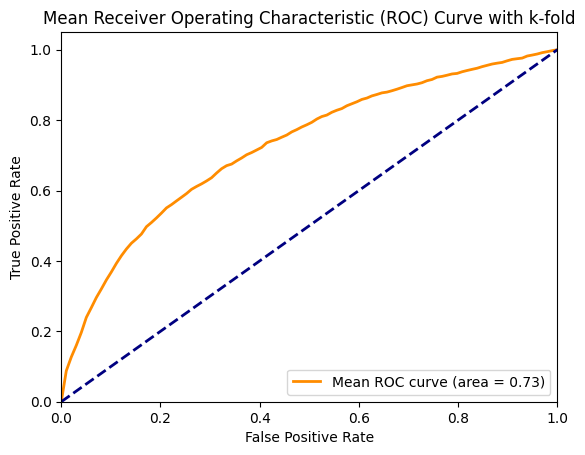

In [ ]:
kfold = KFold(n_splits=20, shuffle=True)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    clf.fit(X_train_fold, y_train_fold)
    
    proba_matrix_fold = clf.predict_proba(X_test_fold)
    fpr, tpr, thresholds = roc_curve(y_test_fold, proba_matrix_fold[:, 1])
    
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    
mean_tpr /= kfold.get_n_splits()

roc_auc = auc(mean_fpr, mean_tpr)

plt.figure()
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='Mean ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve with k-fold')
plt.legend(loc="lower right")
plt.show()